# Data Preprocessing and Feature Selection

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

## Eliminating Missing Values

In [2]:
df = pd.read_csv("missing.csv")
df

,A,B,C,D
0,1,2,3,4
1,5,6,NaN,8
2,0,11,12,NaN


number of missing values in each column.

In [3]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

Different ways of dropping NA values.

In [4]:
# drop rows with missing values
df.dropna()

,A,B,C,D
0,1,2,3,4


In [5]:
# drop columns with missing values
df.dropna( axis = 1 )

,A,B
0,1,2
1,5,6
2,0,11


In [6]:
# drop rows where all columns are NA
df.dropna( how = "all" )

,A,B,C,D
0,1,2,3,4
1,5,6,NaN,8
2,0,11,12,NaN


In [7]:
# drop rows that have at least 4 non-NA columns
df.dropna( thresh = 4 )

,A,B,C,D
0,1,2,3,4


In [8]:
# only drop rows where NA appear in specific columns
df.dropna( subset = ["C"] )

,A,B,C,D
0,1,2,3,4
2,0,11,12,NaN


## Imputing Missing Values

In [9]:
# other strategy = "median", "most_frequent"
# axis = 0 is column-wise impute, so it calculates the column mean in this case 
impute = Imputer( missing_values = "NaN", strategy = "mean", axis = 0 )
imp = impute.fit(df)
imputed_df = imp.transform(df)
imputed_df

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [  0. ,  11. ,  12. ,   6. ]])

## Categorical Data

In [10]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'], 
    ['red', 'L', 13.5, 'class2'], 
    ['blue', 'XL', 15.3, 'class1']
])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


Mapping ordinal features : size. We know that the size of XL > L > M. And assume the difference is XL = L + 1 = M + 2.

In [11]:
# pandas.map
size_mapping = { "XL" : 3, "L" : 2, "M" : 1 }
df["size"] = df["size"].map( size_mapping )
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


Encode class labels as integer values.

In [12]:
class_mapping = { label : idx for idx, label in enumerate( df["classlabel"].unique() ) }
class_mapping

{'class1': 0, 'class2': 1}

In [13]:
df["classlabel"] = df["classlabel"].map( class_mapping )
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [14]:
# inverse mapping
inv_class_mapping = { v : k for k, v in class_mapping.items() }
inv_class_mapping

{0: 'class1', 1: 'class2'}

In [15]:
df["classlabel"] = df["classlabel"].map( inv_class_mapping )
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


Same functionality using sklearn. Note that `fit_transform` is a shortcut for calling fit and transform separately.

In [16]:
class_le = LabelEncoder()
df["classlabel"] = class_le.fit_transform( df["classlabel"] )
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [17]:
# inverse transform
y = class_le.inverse_transform(df["classlabel"])
y

array(['class1', 'class2', 'class1'], dtype=object)

One-hot encoding with nominal categorical variables. pandas's `get_dummies` will only convert string columns and leave all other columns unchanged.

In [18]:
pd.get_dummies( df[["price", "color", "size"]] )

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


## Working with the Wine Dataset

In [19]:
df_wine = pd.read_csv( 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
                       header = None )

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

print('Class labels', df_wine['Class label'].unique() )
df_wine.head()

('Class labels', array([1, 2, 3]))


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
# separate the variable with the class label
x, y = df_wine.iloc[ :, 1: ], df_wine.iloc[ :, 0 ]
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 0 )

Compared to Min-Max scaling, standardization center the feature columns at mean 0 and standard deviation of 1. This makes the algorithm less sensitive to outlier. And it is important to note that you should fit the StandardScaler only once on the training data and use those parameters to transform the test set.

In [21]:
stdsc = StandardScaler()
x_train_std = stdsc.fit_transform( x_train )
x_test_std  = stdsc.transform( x_test )

Common solutions to reduce generalization errors :

- Collect more data.
- Introduce penalty for complexity via regularization.
- Reduce the dimensionality of the data. In other words, only select the more *meaningful* features.

In [22]:
lr = LogisticRegression( penalty = "l1", C = 0.1 )
lr.fit( x_train_std, y_train )
print( lr.score( x_train_std, y_train ) )
print( lr.score( x_test_std, y_test ) )

0.983870967742
0.981481481481


Plotting the regularization Path, weight coefficient of the different features for different regularization.

In [23]:
# loop through different penalty score and obtain the weights and score
weight, params = [], []
for c in np.arange( -4, 6 ) :
    lr = LogisticRegression( penalty = "l1", C = 10 ** c, random_state = 0 )
    lr.fit( x_train_std, y_train )
    weight.append(lr.coef_[1])
    params.append(10 ** c)

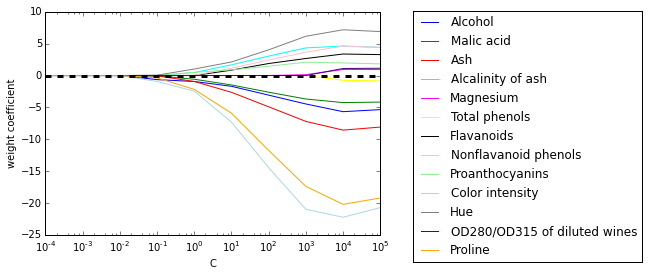

In [24]:
# combine the list of weights into a array and manually set the colors
weights = np.array( weight )
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

# things to note :
# for df_wine.columns the first column is the class label, so + 1 to obtain the actual input column's label
for column, color in zip( range(weights.shape[1]) , colors ) :
    plt.plot( params, weights[ :, column ], label = df_wine.columns[ column + 1 ], color = color )
plt.axhline( 0, color = "black", linestyle = "--", linewidth = 3 )
plt.legend( bbox_to_anchor = ( 1.8, 1.03 ) ) # manually specify the coordinate of the legend
plt.ylabel("weight coefficient")
plt.xlabel("C")
plt.xscale("log")
plt.show()

## Sequential Backward Selection Algorithm

Intuition: sequentially removes features from the full feature set until the new feature subeset contains the desired number of features. In each round the feature subset combination that gives the best performance is kept for training in the next round.

[Algorithm](https://github.com/ethen8181/programming/blob/master/python_machine_learning/chapter4/chapter4.py).

In [25]:
import chapter4 as ch4
from sklearn.neighbors import KNeighborsClassifier

# use KNN as the estimator
# train the algorithm until it only contains 1 feature to look at the performance at each round
knn = KNeighborsClassifier( n_neighbors = 2 )
sbs = ch4.SBS( knn, k_features = 1 )
sbs.fit( x_train_std, y_train )

Plot the best accuracy_score for each round.

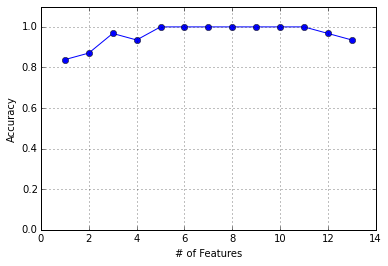

In [26]:
k_feat = [ len(k) for k in sbs.subsets_ ]
plt.plot( k_feat, sbs.scores_, marker = "o" )
plt.ylim( [ 0.0, 1.1 ] ) 
plt.ylabel( "Accuracy" )
plt.xlabel("# of Features")
plt.grid()
plt.show()

A peak at what 5 feature subset lead to 100 percent accuracy_score

In [27]:
subset = list(sbs.subsets_[8])
df_wine.columns[1:][subset]

Index([u'Alcohol', u'Malic acid', u'Alcalinity of ash', u'Hue', u'Proline'], dtype='object')

Compare performance. Using less feature to obtain a higher accuracy and reduce overfitting.

In [28]:
knn.fit( x_train_std, y_train )
print( "Training Accuracy", knn.score( x_train_std, y_train ) )
print( "Testing Accuracy", knn.score( x_test_std, y_test ) )

('Training Accuracy', 0.9838709677419355)
('Testing Accuracy', 0.94444444444444442)


In [29]:
knn.fit( x_train_std[ :, subset ], y_train )
print( "Training Accuracy", knn.score( x_train_std[ :, subset ], y_train ) )
print( "Testing Accuracy", knn.score( x_test_std[ :, subset ], y_test ) )

('Training Accuracy', 0.95967741935483875)
('Testing Accuracy', 0.96296296296296291)


## Random Forest's Feature Importance

In [30]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier( n_estimators = 10000, random_state = 0, n_jobs = -1 )
forest.fit( x_train, y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [31]:
importances = forest.feature_importances_
importances

array([ 0.10658906,  0.02539968,  0.01391619,  0.03203319,  0.02207807,
        0.0607176 ,  0.15094795,  0.01464516,  0.02235112,  0.18248262,
        0.07824279,  0.1319868 ,  0.15860977])

Obtain the features' lable and sorted importance's indices in decreasing order.

In [32]:
indices = np.argsort(importances)[::-1]
feat_labels = df_wine.columns[1:]

# string format
# - : left aligned
# * : a integer for the number of spacing
for f in range( x_train.shape[1] ) :
    print( "%02d) %-*s %f" % ( f + 1, 30, feat_labels[ indices[f] ], importances[ indices[f] ] ) )

01) Color intensity                0.182483
02) Proline                        0.158610
03) Flavanoids                     0.150948
04) OD280/OD315 of diluted wines   0.131987
05) Alcohol                        0.106589
06) Hue                            0.078243
07) Total phenols                  0.060718
08) Alcalinity of ash              0.032033
09) Malic acid                     0.025400
10) Proanthocyanins                0.022351
11) Magnesium                      0.022078
12) Nonflavanoid phenols           0.014645
13) Ash                            0.013916


Plot the importance.

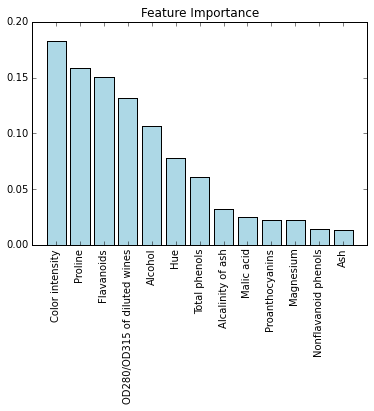

In [33]:
plt.bar( range(x_train.shape[1]), importances[indices], color = "lightblue", align = "center" )
plt.title( "Feature Importance" )
plt.xlim( [ -1, x_train.shape[1] ] )
plt.xticks( range( x_train.shape[1] ), feat_labels[indices], rotation = 90 )
plt.show()